In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from numpy import log



In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/data_set_etherium/full_data__6__2017.csv")
df2=pd.read_csv("/content/drive/MyDrive/data_set_etherium/full_data__6__2018.csv")
df3=pd.read_csv("/content/drive/MyDrive/data_set_etherium/full_data__6__2019.csv")
df4=pd.read_csv("/content/drive/MyDrive/data_set_etherium/full_data__6__2020.csv")
df5=pd.read_csv("/content/drive/MyDrive/data_set_etherium/full_data__6__2021.csv")


In [ ]:
DF=pd.concat([df1,df2,df3,df4,df5])

In [ ]:
DF.head()

,Unnamed: 0,timestamp,Asset_ID,Asset_Name,Weight,Count,Open,High,Low,Close,Volume,VWAP,Target
0,9178560,1509667200,6,NaN,NaN,14.0,283.12,283.65,283.11,283.65,16.08390,661.31,0.003767
1,9178561,1509667260,6,NaN,NaN,18.0,283.65,283.65,283.65,283.65,19.43202,661.85,0.003795
2,9178562,1509667320,6,NaN,NaN,0.0,283.65,283.65,283.65,283.65,0.00000,NaN,0.005200
3,9178563,1509667380,6,NaN,NaN,0.0,283.65,283.65,283.65,283.65,0.00000,NaN,0.006833
4,9178564,1509667440,6,NaN,NaN,1.0,283.65,283.65,283.65,283.65,1.00000,661.85,0.007138


In [ ]:
DF=DF.drop(["Unnamed: 0"],axis=1)

In [ ]:
DF.dtypes

timestamp       int64
Asset_ID        int64
Asset_Name    float64
Weight        float64
Count         float64
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
VWAP          float64
Target        float64
dtype: object

In [ ]:
DF.index=DF.timestamp.apply(lambda x:datetime.fromtimestamp(x))

In [ ]:
DF.drop(["timestamp","Asset_ID","Asset_Name","Weight"],axis=1,inplace=True)

In [ ]:
DF

,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,
2017-11-03 00:00:00,14.0,283.12,283.65,283.11,283.65,16.08390,661.310000,0.003767
2017-11-03 00:01:00,18.0,283.65,283.65,283.65,283.65,19.43202,661.850000,0.003795
2017-11-03 00:02:00,0.0,283.65,283.65,283.65,283.65,0.00000,NaN,0.005200
2017-11-03 00:03:00,0.0,283.65,283.65,283.65,283.65,0.00000,NaN,0.006833
2017-11-03 00:04:00,1.0,283.65,283.65,283.65,283.65,1.00000,661.850000,0.007138
...,...,...,...,...,...,...,...,...
2021-10-06 23:55:00,282.0,3584.25,3584.57,3581.75,3583.68,72.24750,8360.880000,-0.000337
2021-10-06 23:56:00,298.0,3583.68,3585.34,3583.68,3585.34,119.61950,8364.133333,-0.000101
2021-10-06 23:57:00,652.0,3585.01,3588.70,3579.52,3580.06,532.73150,8361.573333,-0.000103


In [ ]:
DF.resample('1D', label='right').mean()

,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,
2017-08-18,3.473611,305.908215,306.000826,305.816583,305.907715,4.953509,713.663708,0.000067
2017-08-19,3.929167,300.653174,300.879465,300.541201,300.756104,6.623504,701.954067,-0.000269
2017-08-20,1.246528,290.947451,291.040611,290.923132,291.003083,1.490415,676.684388,-0.000236
2017-08-21,1.415278,294.106903,294.223285,294.086132,294.195924,1.743152,689.109861,0.000219
2017-08-22,2.725694,320.036243,320.311799,319.900632,320.167090,3.624615,749.096667,0.000683
...,...,...,...,...,...,...,...,...
2021-11-23,807.347917,4177.040660,4180.466125,4173.470556,4176.921826,360.070371,9746.243956,-0.000087
2021-11-24,762.687500,4217.871035,4221.425688,4214.584264,4218.051458,349.174854,9842.027104,0.000312
2021-11-25,687.512500,4263.833535,4267.013444,4260.619368,4263.786944,311.615993,9948.895127,-0.000186


In [ ]:
DF_used=DF[["High","Low","Open","Close","Volume","VWAP"]]

In [ ]:
DF_used=DF_used.resample('1D', label='right').mean()

In [ ]:
DF_used_minute=DF[["High","Low","Open","Close","Volume","VWAP"]] #hourly

In [ ]:
DF_used_minute=DF_used_minute.resample('60min', label='right').mean() #hourly

In [ ]:
DF_used_minute #hourly

,High,Low,Open,Close,Volume,VWAP
timestamp,,,,,,
2017-08-17 01:00:00,301.130000,301.130000,301.130000,301.130000,0.426430,702.636667
2017-08-17 02:00:00,301.130000,301.130000,301.130000,301.130000,0.426430,702.636667
2017-08-17 03:00:00,301.130000,301.130000,301.130000,301.130000,0.426430,702.636667
2017-08-17 04:00:00,301.130000,301.130000,301.130000,301.130000,0.426430,702.636667
2017-08-17 05:00:00,299.887500,299.780833,299.815833,299.847000,2.094480,700.121667
...,...,...,...,...,...,...
2021-11-26 20:00:00,4077.211167,4071.676333,4074.282667,4074.907000,183.782577,9507.189833
2021-11-26 21:00:00,4084.649167,4078.547333,4081.381333,4081.941333,199.531710,9523.843611
2021-11-26 22:00:00,4106.409500,4099.812833,4103.430667,4102.572500,196.843068,9573.746500


In [ ]:
DF_used.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1563 entries, 2017-08-18 to 2021-11-27
Freq: D
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    1551 non-null   float64
 1   Low     1551 non-null   float64
 2   Open    1551 non-null   float64
 3   Close   1551 non-null   float64
 4   Volume  1551 non-null   float64
 5   VWAP    1551 non-null   float64
dtypes: float64(6)
memory usage: 85.5 KB


In [ ]:
DF_used.isnull().sum()


High      0
Low       0
Open      0
Close     0
Volume    0
VWAP      0
dtype: int64

In [ ]:
DF_used_minute.isnull().sum() #per hour


High      0
Low       0
Open      0
Close     0
Volume    0
VWAP      0
dtype: int64

In [ ]:
DF_used_minute=DF_used_minute.interpolate(limit=20, limit_direction="forward") #per hour

In [ ]:
DF_used=DF_used.interpolate(limit=2, limit_direction="forward")

In [ ]:
DF_used.shape

(1563, 6)

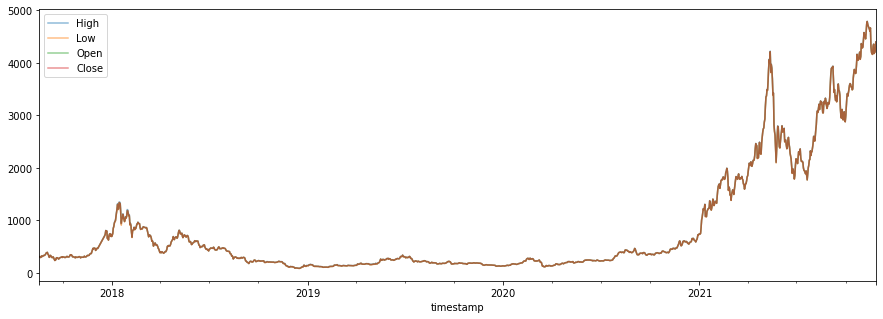

In [ ]:
DF_used[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)


The four had almost same behaviour troughout time and based on this assumption in this project we will only use on one of them  in order to build a model that will  predict future values .

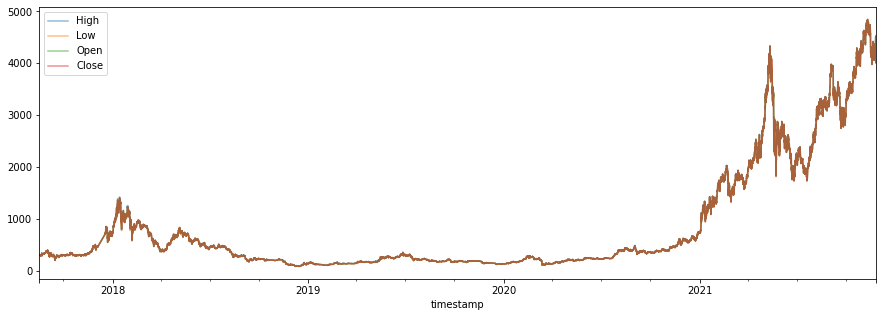

In [ ]:
DF_used_minute[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)


the plot show that there is no important information to use before 2020, due to that we will juste use the data from 2020

In [ ]:
DF_used_minute=DF_used_minute.loc["2020":]

In [ ]:
DF_used_minute

,High,Low,Open,Close,Volume,VWAP
timestamp,,,,,,
2020-01-01 00:00:00,129.290407,128.425667,128.963485,128.962919,228.931752,128.963067
2020-01-01 01:00:00,129.064159,128.289153,128.740371,128.738209,284.910154,128.740126
2020-01-01 02:00:00,130.000526,129.188167,129.624342,129.647553,543.081950,129.638419
2020-01-01 03:00:00,130.916704,130.173167,130.570633,130.576236,334.585177,130.574789
2020-01-01 04:00:00,130.499820,129.769333,130.202711,130.193646,317.734746,130.196188
...,...,...,...,...,...,...
2021-11-26 20:00:00,4077.211167,4071.676333,4074.282667,4074.907000,183.782577,9507.189833
2021-11-26 21:00:00,4084.649167,4078.547333,4081.381333,4081.941333,199.531710,9523.843611
2021-11-26 22:00:00,4106.409500,4099.812833,4103.430667,4102.572500,196.843068,9573.746500


# hourly

## Stationarity

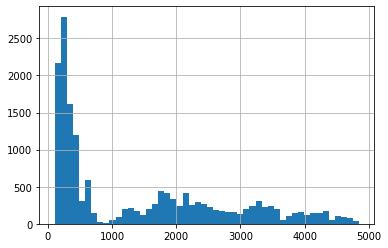

In [ ]:
DF_used_minute.High.hist(bins=50)

In [ ]:
np.round(DF_used_minute.shape[0]/10,0)

1670.0

In [ ]:
from statistics import stdev
mean=[]
std=[]
    
for i in range(10):

    mean.append(DF_used_minute['High'].iloc[(i*1670):(i*1670)+1670].mean())
    std.append(stdev(DF_used_minute['High'].iloc[(i*1670):(i*1670)+1670]))

In [ ]:
pd.concat([pd.DataFrame(mean,columns=['mean']),pd.DataFrame(std,columns=['std'])], axis=1)

,mean,std
0,199.554230,45.899098
1,168.306118,31.636808
2,235.487874,19.884956
3,379.499338,32.445382
4,461.542166,86.034394
5,1209.664127,429.946641
6,1966.333494,353.682630
7,2676.632310,626.252132
8,2897.860216,618.699639
9,3903.614161,569.074365


it's not a stationary time series


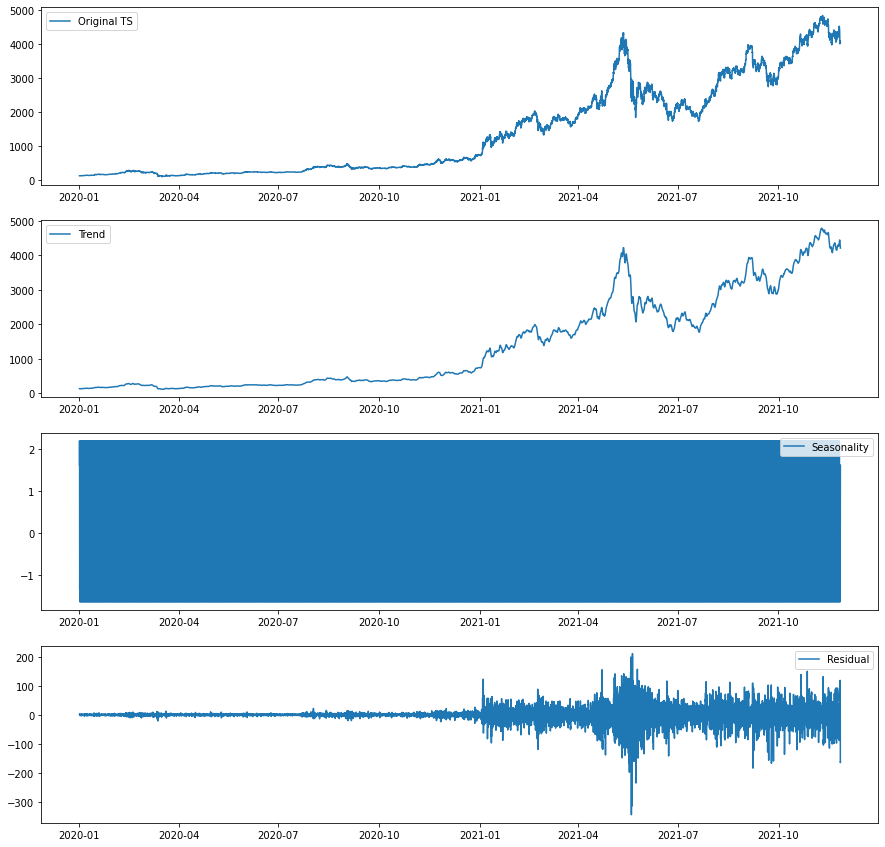

In [ ]:
decompose_add_hourly=seasonal_decompose(DF_used_minute['High'], model='additive')
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(DF_used_minute['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add_hourly.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add_hourly.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add_hourly.resid, label='Residual')
plt.legend(loc='best')

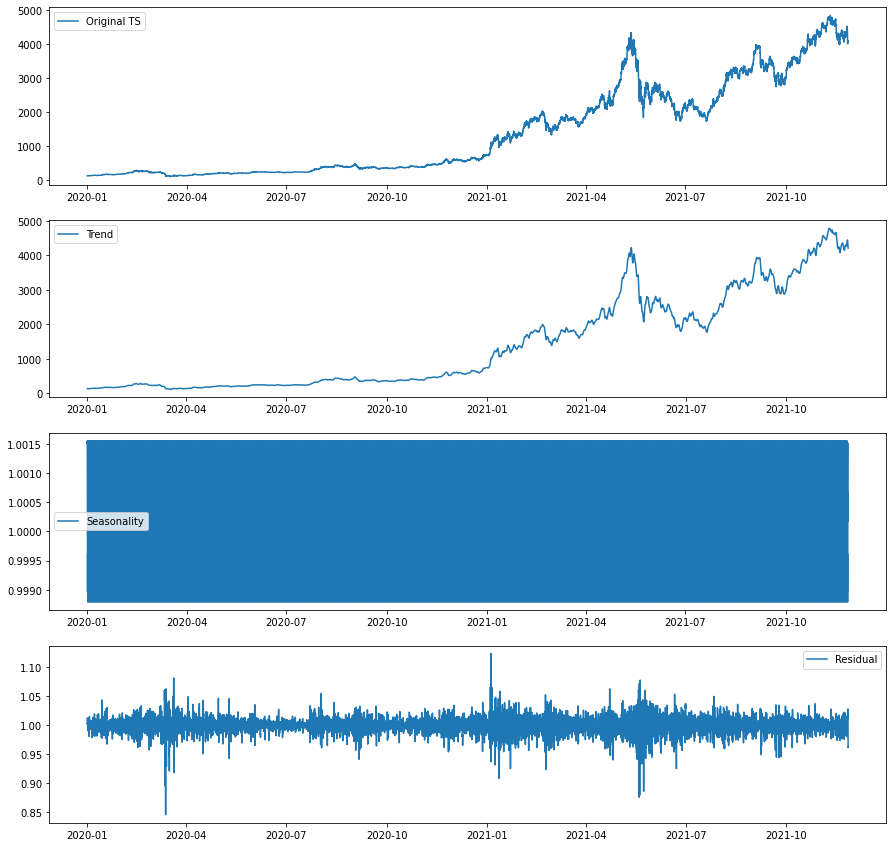

In [ ]:
decompose_mul_hourly=seasonal_decompose(DF_used_minute['High'], model='multiplicative')
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(DF_used_minute['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_mul_hourly.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_mul_hourly.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_mul_hourly.resid, label='Residual')
plt.legend(loc='best')

 we will make the Augmented Dickey-Fuller test, using 5% as significance level and declaring the following hypothesis:

H0= Serie corresponds to non-stationary type.
H1= Serie corresponds to stationary type.*texte en italique*

In [ ]:
result = adfuller(DF_used_minute['High'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.064697
p-value: 0.952843
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


As p-value is greater than 0.05 we can't  reject the null hypothesis, therefore there is not enough evidence to reject that we are working with a non-stationary series. Let's apply the log transformation to the serie and test again.

In [ ]:

result = adfuller(log(DF_used_minute['High']))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.725066
p-value: 0.840150
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


## Model

In [ ]:
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

 the serie clearly corresponds to a non-stationary type



Firstly, we will define a new dataset equal to the existing one, but omitting the last four records, later we will use the model to predict such values.

In [ ]:
new_df_h=DF_used_minute['High'].iloc[:-4]


In [ ]:
train_len = math.ceil(len(new_df_h)*0.8)
train_len

13361

the length of the training set as 80% of the total records we will start by using a window of 10

In [ ]:
window=10

In [ ]:
train_data = new_df_h[0:train_len]

X_train=[]
Y_train=[]

for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])
X_train, Y_train= np.array(X_train), np.array(Y_train)


 the first model to be used is simple with one LSTM layer with relu activation function and one hidden fully connected layer, the optimizer used is Adam, number of epochs=10, batch_size=10 and loss function=Mean squared error:

In [ ]:
model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_data = new_df_h[train_len-window:]

X_val=[]
Y_val=[] 

for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))


Now we will predict using our model

In [ ]:
prediction = model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 23.207098893895378
Validation rmse: 52.89562492072462


Both errors are high, we aim to improve this as we build a robust model in the next steps.

In [ ]:
valid = pd.DataFrame(new_df_h[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,High,Predictions
timestamp,,
2021-07-10 17:00:00,2135.799167,2147.993652
2021-07-10 18:00:00,2100.435000,2165.989258
2021-07-10 19:00:00,2090.074000,2128.773926
2021-07-10 20:00:00,2099.094667,2118.595215
2021-07-10 21:00:00,2093.004500,2128.624756
...,...,...
2021-11-26 16:00:00,4074.937833,4161.581055
2021-11-26 17:00:00,4069.912500,4131.676270
2021-11-26 18:00:00,4087.541833,4125.884766


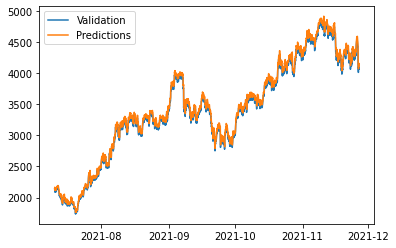

In [ ]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()


we can see a simple plot showing both curves, in which  there is a difference  to the right prediction curve.

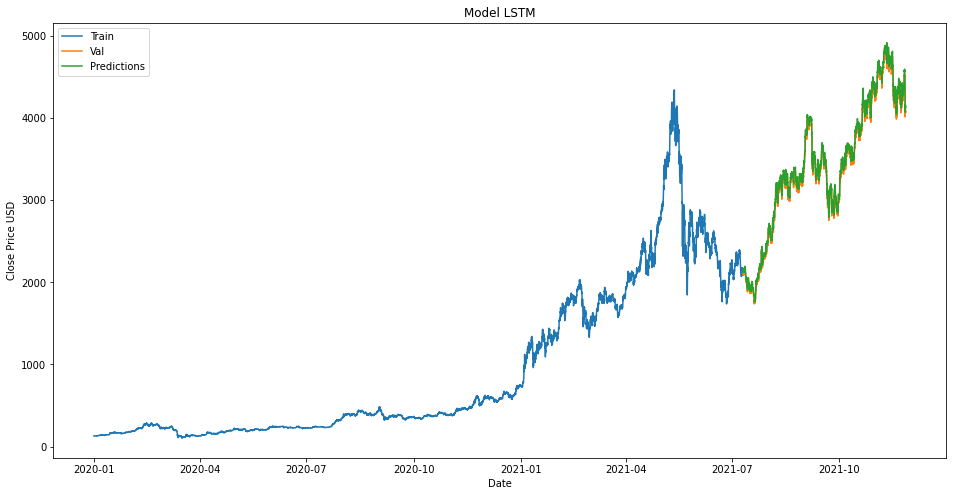

In [ ]:
train = new_df_h[:train_len]
valid = pd.DataFrame(new_df_h[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

# Daily

## Stationarity

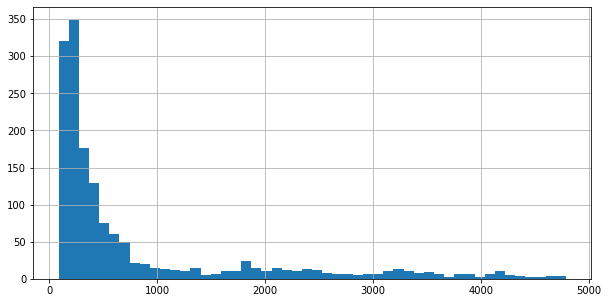

In [ ]:
DF_used.High.hist(bins=50)

using this plot we can't assume if there is a stationarity or not let's use some statistical summary by chunking the data into chunks


In [ ]:
np.round(DF_used.shape[0]/10,0)

156.0

In [ ]:
from statistics import stdev
mean=[]
std=[]
    
for i in range(10):

    mean.append(DF_used['High'].iloc[(i*156):(i*156)+156].mean())
    std.append(stdev(DF_used['High'].iloc[(i*156):(i*156)+156]))

In [ ]:
pd.concat([pd.DataFrame(mean,columns=['mean']),pd.DataFrame(std,columns=['std'])], axis=1)

,mean,std
0,476.583198,276.513155
1,684.221802,195.741067
2,289.838243,110.876561
3,134.863661,23.363758
4,225.234769,43.640542
5,178.907583,39.276399
6,219.558664,66.362086
7,515.065339,215.457154
8,2168.484503,681.980545
9,3220.131944,844.181848


measures are clearly different in each chunk now we can assume it's a not stationary serie.


Now we will try to decompose the serie into trend,into trend, seasonal and residual, either additive or multiplicative

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


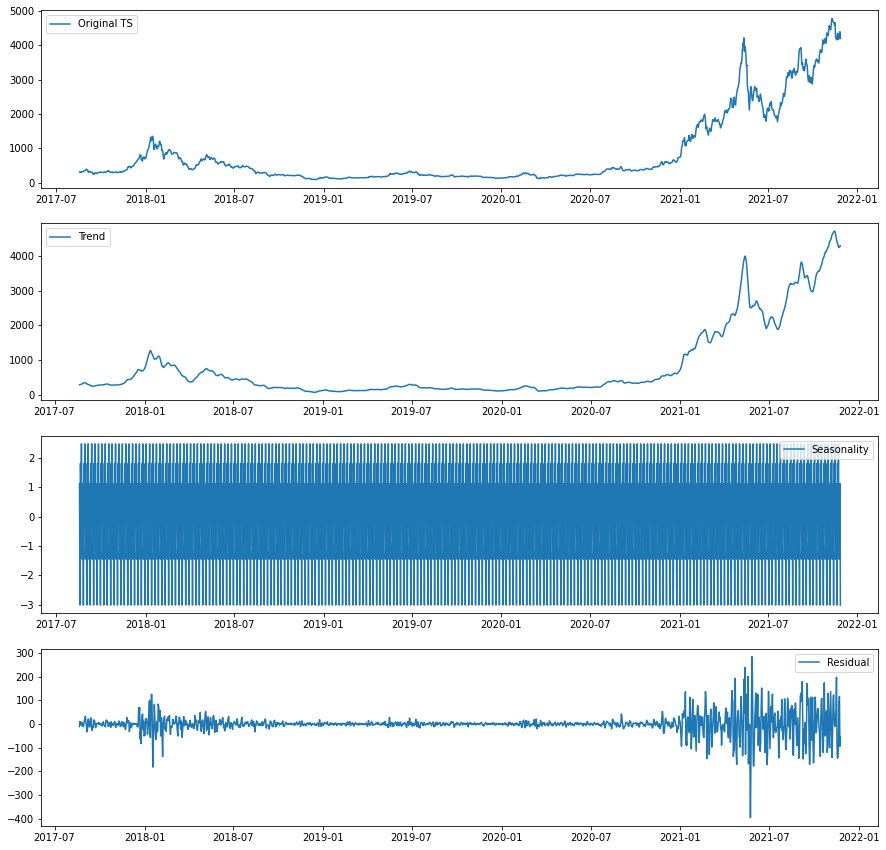

In [ ]:
decompose_add=seasonal_decompose(DF_used['High'], model='additive')
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(DF_used['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best')

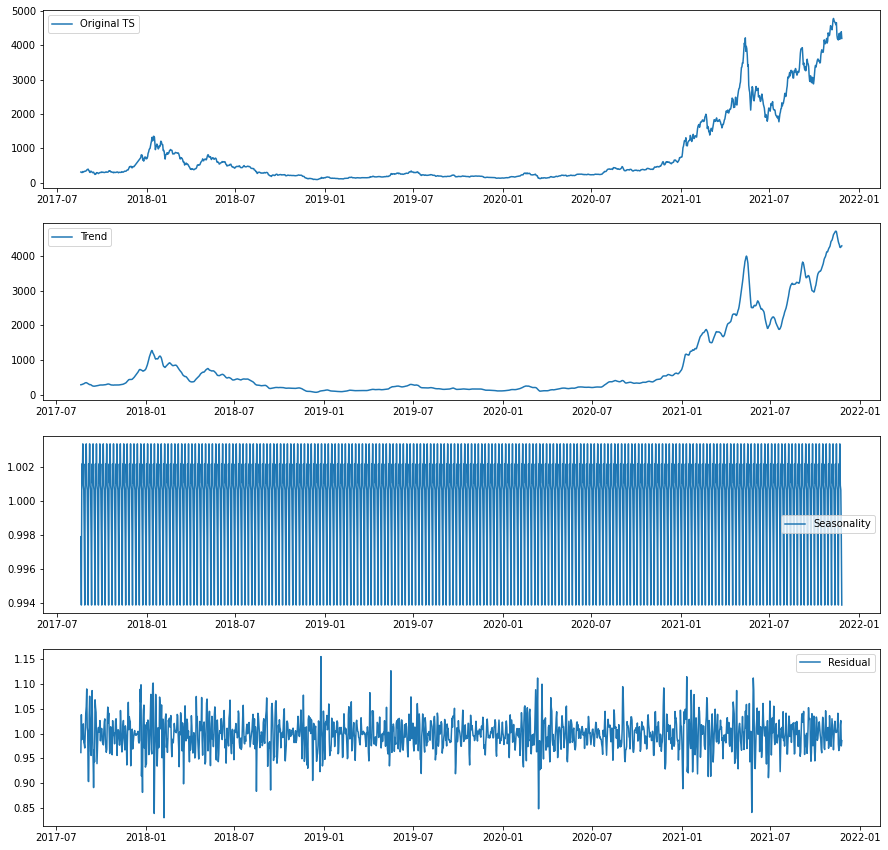

In [ ]:
decompose_mul=seasonal_decompose(DF_used['High'], model='multiplicative')
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(DF_used['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_mul.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_mul.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_mul.resid, label='Residual')
plt.legend(loc='best')

Independent of this there is a trend and seasonal component between 2021 and 2022

we will  see the ACF and PACF plots to visualise the autocorrelation 

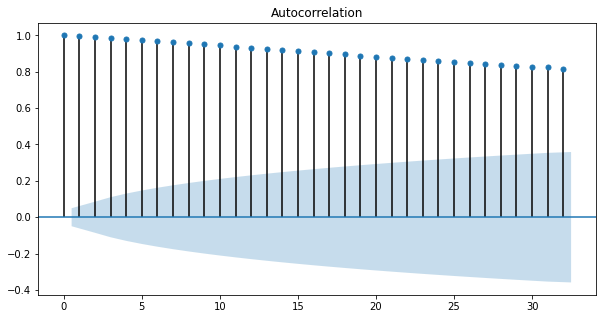

In [ ]:
plt.rc("figure", figsize=(10,5))
plot_acf(DF_used['High'])
print()

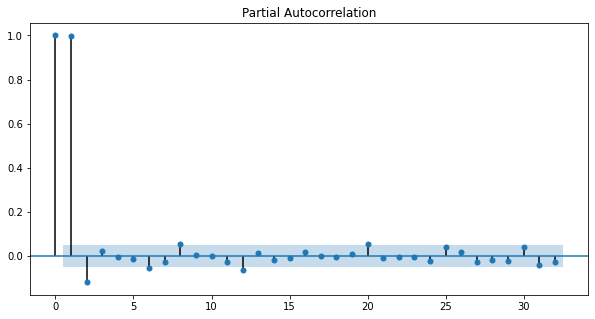

In [ ]:
plt.rc("figure", figsize=(10,5))
plot_pacf(DF_used['High'])
print()

The ACF shows a gradually decreasing trend while the PACF cuts immediately after one lag. Thus, the graphs suggest that an AR (1) model would be appropriate for the time series.

 we will make the Augmented Dickey-Fuller test, using 5% as significance level and declaring the following hypothesis:

H0= Serie corresponds to non-stationary type.
H1= Serie corresponds to stationary type.*texte en italique*

In [ ]:
result = adfuller(DF_used['High'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.233176
p-value: 0.996207
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


As p-value is greater than 0.05 we can't  reject the null hypothesis, therefore there is not enough evidence to reject that we are working with a non-stationary series. Let's apply the log transformation to the serie and test again.

In [ ]:

result = adfuller(log(DF_used['High']))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.089717
p-value: 0.950453
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


 the serie clearly corresponds to a non-stationary type



